
## **Principio de Segregación de Interfaces (ISP) - Exposición**
 El **Principio de Segregación de Interfaces** establece que una clase no debe estar obligada a depender de interfaces que no utiliza. En otras palabras, es preferible tener varias interfaces específicas en lugar de una única interfaz grande y con muchas responsabilidades..

---

## 📝 Caso de Estudio: Sistema de Gestión de Inventario

Una empresa multinacional está desarrollando un sistema de gestión de empleados que debe manejar diferentes tipos de trabajadores:

1. Trabajadores de oficina (OfficeWorker), que trabajan y comen, pero no duermen en el trabajo.
2. Trabajadores manuales (ManualWorker), que trabajan, comen y también pueden dormir en el sitio de trabajo.
3. Robots (RobotWorker), que solo trabajan y no necesitan comer ni dormir.


El equipo de desarrollo diseñó una interfaz Worker, que obliga a todas las clases a implementar métodos que algunos trabajadores no necesitan. Esto genera problemas de acoplamiento y hace que las clases implementen métodos innecesarios.



## **🚨 Código que Viola Principio de Segregación de Interfaces**




In [3]:
from abc import ABC, abstractmethod

# 🔴 Interfaz con demasiadas responsabilidades
class Worker(ABC):
    @abstractmethod
    def work(self):
        """Método para trabajar"""
        pass

    @abstractmethod
    def eat(self):
        """Método para comer"""
        pass

    @abstractmethod
    def sleep(self):
        """Método para dormir"""
        pass

# 🔴 OfficeWorker no necesita sleep, pero está obligado a implementarlo
class OfficeWorker(Worker):
    def work(self):
        print("📊 Trabajando en la oficina...")

    def eat(self):
        print("🍽️ Almorzando en la cafetería...")

    def sleep(self):
        print("❌ Un trabajador de oficina no debería tener este método.")

# 🔴 ManualWorker sí necesita todas las funcionalidades
class ManualWorker(Worker):
    def work(self):
        print("🔨 Trabajando en el sitio de construcción...")

    def eat(self):
        print("🥪 Almorzando en el sitio de trabajo...")

    def sleep(self):
        print("💤 Durmiendo en la casa de descanso...")

# 🔴 Si agregamos un RobotWorker, tendría que implementar eat() y sleep(), lo cual no tiene sentido.
class RobotWorker(Worker):
    def work(self):
        print("🤖 Trabajando en la fábrica...")

    def eat(self):
        print("❌ Un robot no necesita comer.")

    def sleep(self):  # Si remuevo esta linea de codigo, el programa no funcionara por que la clase RobotWorker no implementa el metodo sleep
        print("❌ Un robot no necesita dormir.")

# Prueba del código
if __name__ == "__main__":
    office_worker = OfficeWorker()
    manual_worker = ManualWorker()
    robot_worker = RobotWorker()

    print("\n--- Office Worker ---")
    office_worker.work()
    office_worker.eat()
    office_worker.sleep()  # ❌ Método innecesario

    print("\n--- Manual Worker ---")
    manual_worker.work()
    manual_worker.eat()
    manual_worker.sleep()  # ✅ Correcto

    print("\n--- Robot Worker ---")
    robot_worker.work()
    robot_worker.eat()  # ❌ Método innecesario
    robot_worker.sleep()  # ❌ Método innecesario



--- Office Worker ---
📊 Trabajando en la oficina...
🍽️ Almorzando en la cafetería...
❌ Un trabajador de oficina no debería tener este método.

--- Manual Worker ---
🔨 Trabajando en el sitio de construcción...
🥪 Almorzando en el sitio de trabajo...
💤 Durmiendo en la casa de descanso...

--- Robot Worker ---
🤖 Trabajando en la fábrica...
❌ Un robot no necesita comer.
❌ Un robot no necesita dormir.


---

## **🔴 ¿Por qué este código viola ISP?**
1. La interfaz **`Worker`** obliga a todas las clases a implementar métodos innecesarios.

    - `officeWorker` no necesita el método `sleep`.
    - `ManualWorker` podría no necesitar `eat` o `sleep` en ciertos casos.

2. Si agregamos un nuevo tipo de trabajador, como un robot industrial, también tendría que implementar eat y sleep, aunque no tiene sentido para él.

2. Un cambio en la interfaz `Worker` impactaría a todas las clases que la implementan, lo que hace el código difícil de mantener y escalar. Falta de cohesión y modularidad



## **✅ Solución: Separar Interfaces**
Para corregir este problema, dividimos la interfaz `Worker` en interfaces más específicas, siguiendo el Principio de Segregación de Interfaces:

---

### **✅ Código Mejorado**




In [21]:
from abc import ABC, abstractmethod

# ✅ Interfaz solo para quienes trabajan
class Workable(ABC):
    @abstractmethod
    def work(self):
        pass

# ✅ Interfaz solo para quienes comen
class Eatable(ABC):
    @abstractmethod
    def eat(self):
        pass

# ✅ Interfaz solo para quienes duermen
class Sleepable(ABC):
    @abstractmethod
    def sleep(self):
        pass

# ✅ OfficeWorker solo implementa las interfaces que necesita
class OfficeWorker(Workable, Eatable):
    def work(self):
        print("📊 Trabajando en la oficina...")

    def eat(self):
        print("🍽️ Almorzando en la cafetería...")

# ✅ ManualWorker implementa todas las interfaces necesarias
class ManualWorker(Workable, Eatable, Sleepable):
    def work(self):
        print("🔨 Trabajando en el sitio de construcción...")

    def eat(self):
        print("🥪 Almorzando en el sitio de trabajo...")

    def sleep(self):
        print("💤 Durmiendo en la casa de descanso...")

# ✅ RobotWorker solo implementa la interfaz Workable
class RobotWorker(Workable):
    def work(self):
        print("🤖 Trabajando en la fábrica...")

# 🚀 Prueba del código
if __name__ == "__main__":
    office_worker = OfficeWorker()
    manual_worker = ManualWorker()
    robot_worker = RobotWorker()

    print("\n--- Office Worker ---")
    office_worker.work()
    office_worker.eat()

    print("\n--- Manual Worker ---")
    manual_worker.work()
    manual_worker.eat()
    manual_worker.sleep()

    print("\n--- Robot Worker ---")
    robot_worker.work()



--- Office Worker ---
📊 Trabajando en la oficina...
🍽️ Almorzando en la cafetería...

--- Manual Worker ---
🔨 Trabajando en el sitio de construcción...
🥪 Almorzando en el sitio de trabajo...
💤 Durmiendo en la casa de descanso...

--- Robot Worker ---
🤖 Trabajando en la fábrica...


---

## **✅ ¿Por qué esta versión es mejor?**
✅ Cada clase solo implementa los métodos que necesita.

✅ Si agregamos un nuevo tipo de trabajador, no tendrá métodos innecesarios.

✅ El código es más modular y fácil de extender.

✅ Un cambio en una interfaz no afecta a todas las clases.  


---

## **🚀 Comparación Antes vs. Después**
| Problema | Código Anterior 🚨 | Código Mejorado ✅ |
|----------|-------------------|-------------------|
| **Acoplamiento** | Todas las clases dependían de métodos innecesarios.| Cada clase solo implementa los métodos que usa. |
| **Extensibilidad** |Agregar un nuevo tipo de trabajador implicaba modificar una interfaz grande. | Se pueden agregar nuevos trabajadores sin cambiar las interfaces existentes. |
| **Extensibilidad** |Un cambio en la interfaz `Worker` afectaba a todas las clases. | Cada interfaz es independiente, minimizando impactos. |

---
## ¿Cuándo se usa ISP?
Se aplica cuando:

- Una interfaz tiene demasiados métodos, lo que obliga a las clases a implementar funciones que no usan.
- Las clases dependen de métodos innecesarios, afectando la modularidad y escalabilidad.
- El código es difícil de extender, ya que modificar una interfaz grande impacta a todas las clases que la implementan.
- Se detecta una falta de cohesión, es decir, cuando una interfaz tiene métodos no relacionados entre sí.

---
## 🔄 ¿Cómo se complementa o interfiere con otros principios de diseño?

✅ Se complementa con:

✔ Single Responsibility Principle (SRP) – Al dividir interfaces grandes en específicas, cada interfaz cumple con una única responsabilidad.

✔ Open/Closed Principle (OCP) – Al tener interfaces separadas, se pueden agregar nuevas sin modificar el código existente.

✔ Dependency Inversion Principle (DIP) – ISP ayuda a definir dependencias en interfaces bien diseñadas y específicas, en lugar de depender de una interfaz general con muchas responsabilidades.


⚠️ Puede interferir con:

🔸 Si se crean demasiadas interfaces pequeñas y separadas, el código puede volverse innecesariamente complejo.

🔸 Es necesario encontrar un equilibrio para evitar tener demasiadas interfaces sin un beneficio real.


---

## **🎯 Conclusión**

El Principio de Segregación de Interfaces (ISP) ayuda a crear código modular, fácil de extender y más mantenible al evitar que las clases implementen métodos que no necesitan. Su correcta aplicación mejora la cohesión y reduce el acoplamiento en los sistemas de software.

## **Ejemplo Practico - Incorrecto**


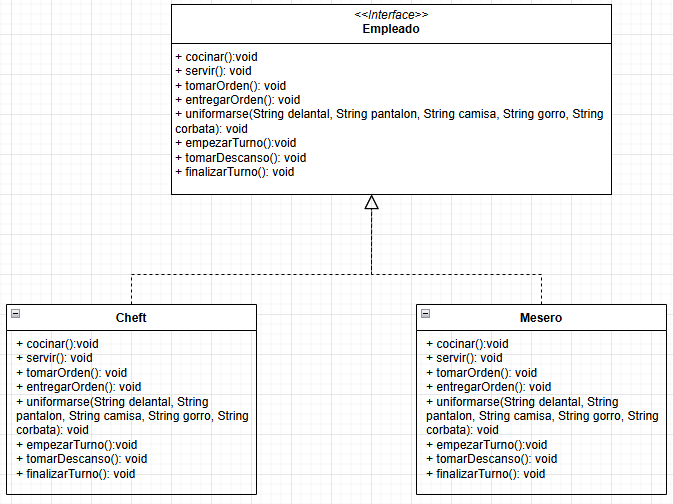

## **✅ Ejemplo Practico - Correcto**


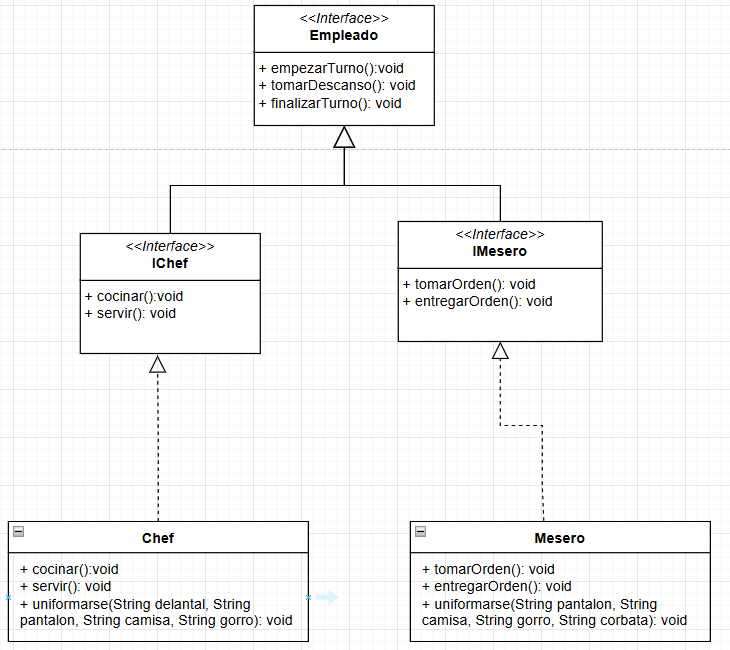